# Illustrating the F-test in Action

## Introduction

If you want to know "how much" you are getting from a regression model or partition, you should use the F-statistic and F-test. These are tools for model quality evaluation, a topic that is becoming more critical every day.

B. S. Everitt, *The Cambridge Dictionary of Statistics*, Cambridge 2005 defines "statistic" as "a numeric characteristic of a sample." When we have many possible models or variations of models to evaluate, a statistic become our representative, and standsin for us in screening and evaluation. We use statistics when we can't look at everything directly ourselves. As statistics stand in for us we want them to have a number of properties:

  * Sensitive: able to detect good relations or models if there are such.
  * Specific: able reject on non-effective models.
  * Unbiased: doesn't have a non-quality driven preference for some style or subset of models.
  * Quantitative: able to translate "model quality" into a numeric quantity that orders models by quality and allows us to choose between models.
  * Invariant/Robust: approximately correct under a wide variety of situations.
  * Calibrated: able to judge if a model effect is large or small.

We can consider the F-statistic itself (a measure of association or effect size) along with a companion F-test significance statistic (that helps set scale or calibrate) as a evaluation system with all of the above properties. The F-statistic was part of the evaluation procedure in [our writeup on analysis of variance methods](https://win-vector.com/2024/02/28/what-good-is-analysis-of-variance/). In this note we spend some more time to try and give a clear view of the F-statistic.

Let's see the F-statistic in action (this time using Python).

## A Non-Example

In [1]:
# import or packages and modules
from typing import List
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from plot_f import plot_F_curve, plt_block_reln

In [2]:
# seed the pseudo random generator for repeatability
rng = np.random.default_rng(439678)

A common use of the F-statistic is to evaluate if a partitioning of data is grouping the data in a meaningful manner (with respect to a single numeric dependent or outcome variable). As an illustration, let's group data into 10 blocks of 100 items in each block, or 1000 items total per data set.  Our groups will be contiguous blocks in our list or vector: the first group is the first 100 values, and so on.

In [3]:
n_blocks = 10
block_size = 100

For our data, we will first generate +1/-1 noise with no relation to the grouping. Notice this data is not normally or Gaussian distributed, but we will show the significance results we get are accurate.

In [4]:
def rand_source(size: int) -> List[float]:
    return list(2 * rng.binomial(1, 0.5, size=size) - 1)

In [5]:
noise = rand_source(n_blocks * block_size)
f_values_null = noise

We show the first two groups or blocks of 100 values each (from the 1000 total values) we have..

In [6]:
np.asarray(f_values_null[0:block_size])

array([ 1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1])

In [7]:
np.asarray(f_values_null[block_size:(2 * block_size)])

array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1])

Now that we have our data we can ask `scipy.stats.f_oneway()` if the numeric values are well sorted by the grouping (they are not).

Our clustering is implemented by splitting the data with the first 100 items in the first block, the next 100 items in the next block, and so on. We can do this with `np.split()`.

In [8]:
split_data_null = list(np.split(np.array(f_values_null), n_blocks))

And we show the first two blocks (of 100), which pick up the first 200 numbers we showed.

In [9]:
split_data_null[0:2]

[array([ 1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
         1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
         1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
        -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
         1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
         1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,
         1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
         1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1])]

Notice the blocks or groups split the data the same we did by hand.

We can use the F-test to show there is no great evidence of a relation between the group and the outcome value.

In [10]:
f_test_null = f_oneway(*split_data_null)

f_test_null

F_onewayResult(statistic=0.6114308714026965, pvalue=0.7880629191348532)

The test reports an F-statistic of 0.61 (larger than 1 is considered indicative of a strong signal) and a significance (or "pvalue") of 0.78.  The significance of 0.78 means: assuming there is no relationship between the grouping and the outcome variable, we expect to see an F-statistic this large or larger around 78% of the time. I.e.: this sort of observation is not rare under noise or chance. That makes it hard to get excited about this grouping (which is the correct conclusion).

## A True Signal Example

Now let's analyze data where there is a relation between the group and the outcome.

We set up our data by adding a per-group perturbation to our original noisy data.

In [11]:
group_adjustments = 0.15 * rng.normal(size=n_blocks)
f_values_effect = (
    np.asarray(noise)
    + np.asarray(sum([[group_adjustment] * block_size for group_adjustment in group_adjustments], []))
)


Now, by design, there is relation between the group label and the outcome values.

In [12]:
split_data_effect = list(np.split(np.array(f_values_effect), n_blocks))

We can show the strong relation between group ID and group mean with a graph relating `split_data_effect` to the observed group means. The relation between this is dependent on the group ID, so seeing a strong linear relation is evidence the group or block ID is in fact informative. We are using the idea that the generative process (the `group_adjustments` vector) is unobserved information we wish to estimate from our observed data (the `f_values_effect` data). The two structures are not in one to one correspondence, but they are related.

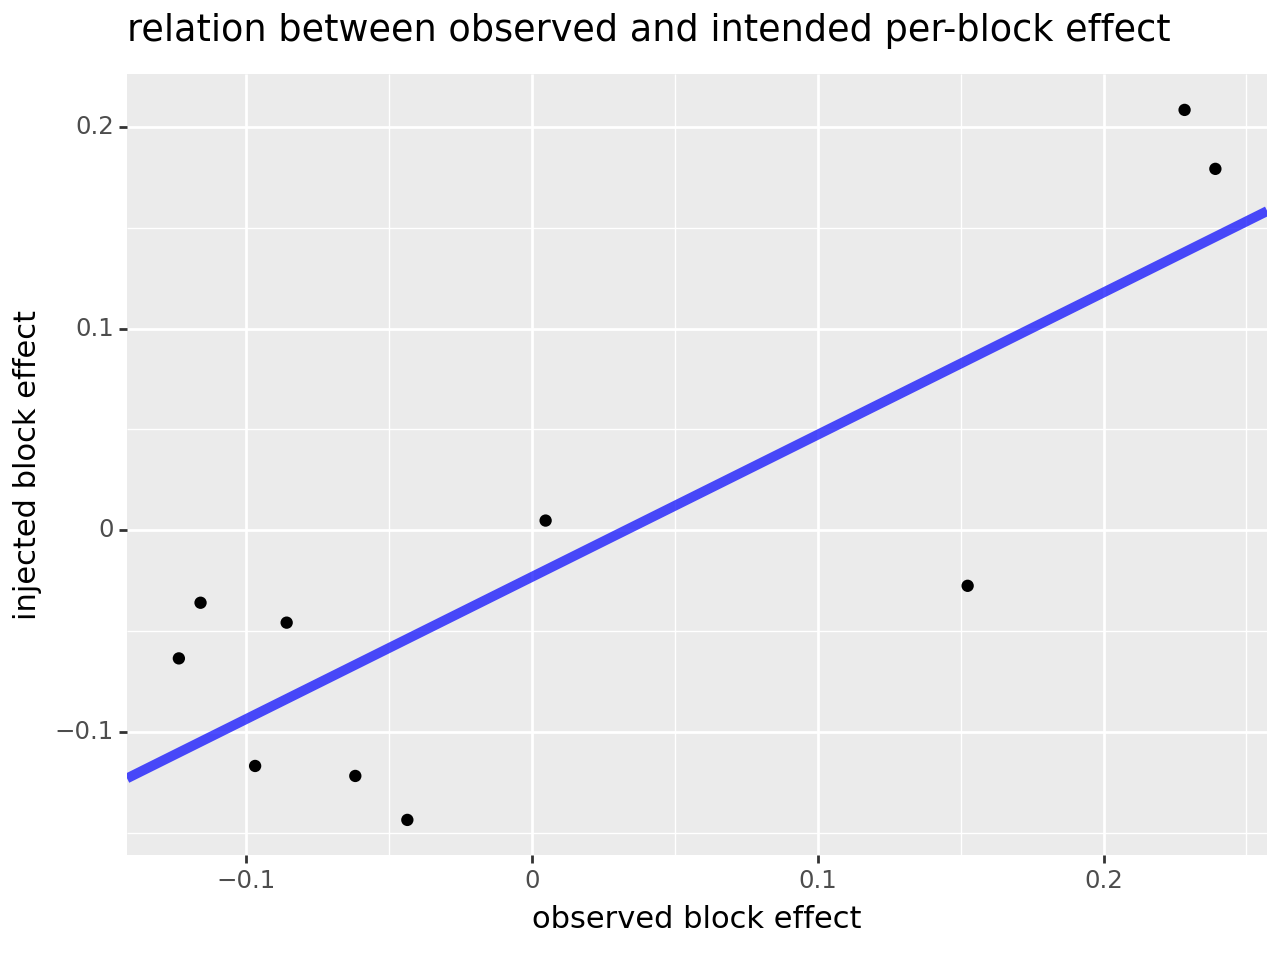

In [13]:
plt_block_reln(
    group_adjustments=group_adjustments,
    split_data_effect=split_data_effect
).draw()

For each block (or dot): we want to know values on the y-axis. We only observe the values on the x-axis. So we use the x-values as our estimates for the y-values. Some are over-estimates, some are under-estimates. We just can't tell from the observed data alone which are which!

We can run an F-test to quantify how informative knowing the group label is in predicting the mean values in a group (which itself helps in predicting values for instances in each group).

In [14]:
f_test_effect = f_oneway(*split_data_effect)

f_test_effect

F_onewayResult(statistic=2.023414768229577, pvalue=0.03393081810579499)

Now the test reports a large statistic (much bigger than 1) and a significant p-value (significant being near zero!). The observed F-statistic is unlikely under the assumption there is no relation (which, unfortunately, is *not* the same as saying "it is unlikely there is no relation!").

## The F-statistic Examined

The right way to perform the F-test is to use a full featured statistical package, such as `scipy.stats`. However, we show the explicit calculation for the special case of partitioning data into groups below. This is to answer the question "what is the formula for the F-statistic?". We are working under the assumption our audience has a lot of programmers who can be communicated to in code and through formal assertions.

In [15]:
def f_statistic(values, *, n_blocks: int, block_size: int) -> float:
    """
    Compute the F-statistic directly for a vector that is n_blocks
    of consecutive blocks of each of block_size entries. The partition
    we are evaluating the F-statistic of is the ordered to-block partition.
    This is for teaching purposes, scipy.stats.f_oneway is a good implementation
    to use in production.

    Please see: 
    https://en.wikipedia.org/wiki/F-test
    https://win-vector.com/2024/02/28/what-good-is-analysis-of-variance/

    :param values: vector of n_blocks * block_size floating point values.
    :param n_blocks: number of blocks or groups.
    :param block_size: size of each block or group.
    :return: F-statistic or partition
    """
    n_blocks = int(n_blocks)
    block_size = int(block_size)
    assert n_blocks >= 1
    assert block_size >= 1
    assert len(values) == n_blocks * block_size
    d = pd.DataFrame({
        'y': values,
        'g': sum([[i] * block_size for i in range(n_blocks)], []),
    })
    d['group mean'] = d.groupby(['g']).transform(np.mean)
    d['grand mean'] = np.mean(d['y'])
    square_model_displacement = np.sum((d['group mean'] - d['grand mean'])**2) 
    residual_square_error = np.sum((d['y'] - d['group mean'])**2) 
    F_stat = (
        (square_model_displacement / (n_blocks - 1)) 
        / (residual_square_error / (n_blocks * block_size - n_blocks))
    )
    initial_square_error = np.sum((d['y'] - d['grand mean'])**2)
    square_error_improvement = initial_square_error - residual_square_error
    assert np.abs(square_model_displacement - square_error_improvement) < 1e-8
    # for why square_model_displacement is sometimes used instead of square_error_improvement
    # and why they are identical please see:
    #   https://win-vector.com/2024/02/28/what-good-is-analysis-of-variance/
    return F_stat



We can confirm this matches the package calculation.

In [16]:
f_stat_null = f_statistic(
    f_values_null, 
    n_blocks=n_blocks, 
    block_size=block_size)

f_stat_null

0.6114308714026968

In [17]:
assert np.abs(f_stat_null - f_test_null[0]) < 1e-8

In [18]:
f_stat_effect = f_statistic(f_values_effect, n_blocks=n_blocks, block_size=block_size)

f_stat_effect

2.023414768229577

In [19]:
assert np.abs(f_stat_effect - f_test_effect[0]) < 1e-8

Showing the formula lets us describe why the F-statistic is somewhat robust:

  * It depends only on sums of squared differences. This means it is shift invariant. Adding any constant to all data changes nothing. We don't need to assume the data is centered or mean 0.
  * It depends only on a ratio of sums of squared differences. This means the statistic is homogeneous and scale invariant. Re-scaling the data changes nothing. We don't need to assume the data is scaled or variance 1.
  * Everything is in terms of sums. This means, if all the items in the sum tend to be small (say from low-variance data) then: for large data the sums start to obey good distributional assumptions (proportional to chi-square distributions) without needing further assumptions about the underlying day (such as the usual normality assumption).

Now that we have the F-statistic, let's move on the F-test (the addition of a calculated excitement or significance about the statistic).

## Working on the Significance

### Significance as a Fraction of a Sample

Now that we have demonstrated a statistic, let's look at the associated significance. To do this we will re-draw 10000 more vectors distributed as our null or no-effect hypothesis (no relation between the data and the groups). Each of these draws represent an entire new data set (itself consisting of instances or rows).

In [20]:
n_reps = 10000

In [21]:
generator_sampled_evals = [
    f_statistic(
        rand_source(size=n_blocks * block_size), 
        n_blocks=n_blocks, 
        block_size=block_size)
    for i in range(n_reps)]

Nota bene: this sample is a bit tricky. Each item in the sample is an entire re-simulated data set with new outcome values and the same implied contiguous block oriented grouping. Inside each sample we have many values that we traditionally call instances. This odd set up is because: each example in this data set is re-simulating the entire analysis process of working over a data set itself consisting of many instances.

With the additional example data, computing a significance is just a matter of calculating what fraction of the F-statistics are at least as large as the one we are interested in.

In [22]:
np.mean(np.asarray(generator_sampled_evals) >= f_stat_null)

0.7902

The above says the 0.61 F-statistic is met or exceeded 79% of the time (so does not stand out as exciting). 

In [23]:
np.mean(np.asarray(generator_sampled_evals) >= f_stat_effect)

0.033

And the effect F-statistic only met or exceeded about 3.3% of the time, which is considered potentially exciting evidence.

I like to teach significance this way, as it shows the meaning of any later calculation.

There are three criticisms of the using the above directly for a significance calculation:

  * It requires the ability to generate new data at will (we wil show how to work around this by resampling methods later).
  * It requires a lot of new data to correctly estimate rare events (such as significant outcomes).
  * It is a lot of work, or computationally inefficient.

Think of the above scheme as the ideal, and we will now move on to ideas that give us more efficient realizations.



### Details of the Distribution

The detailed distribution of this additional simulated scoring data looks like the following.

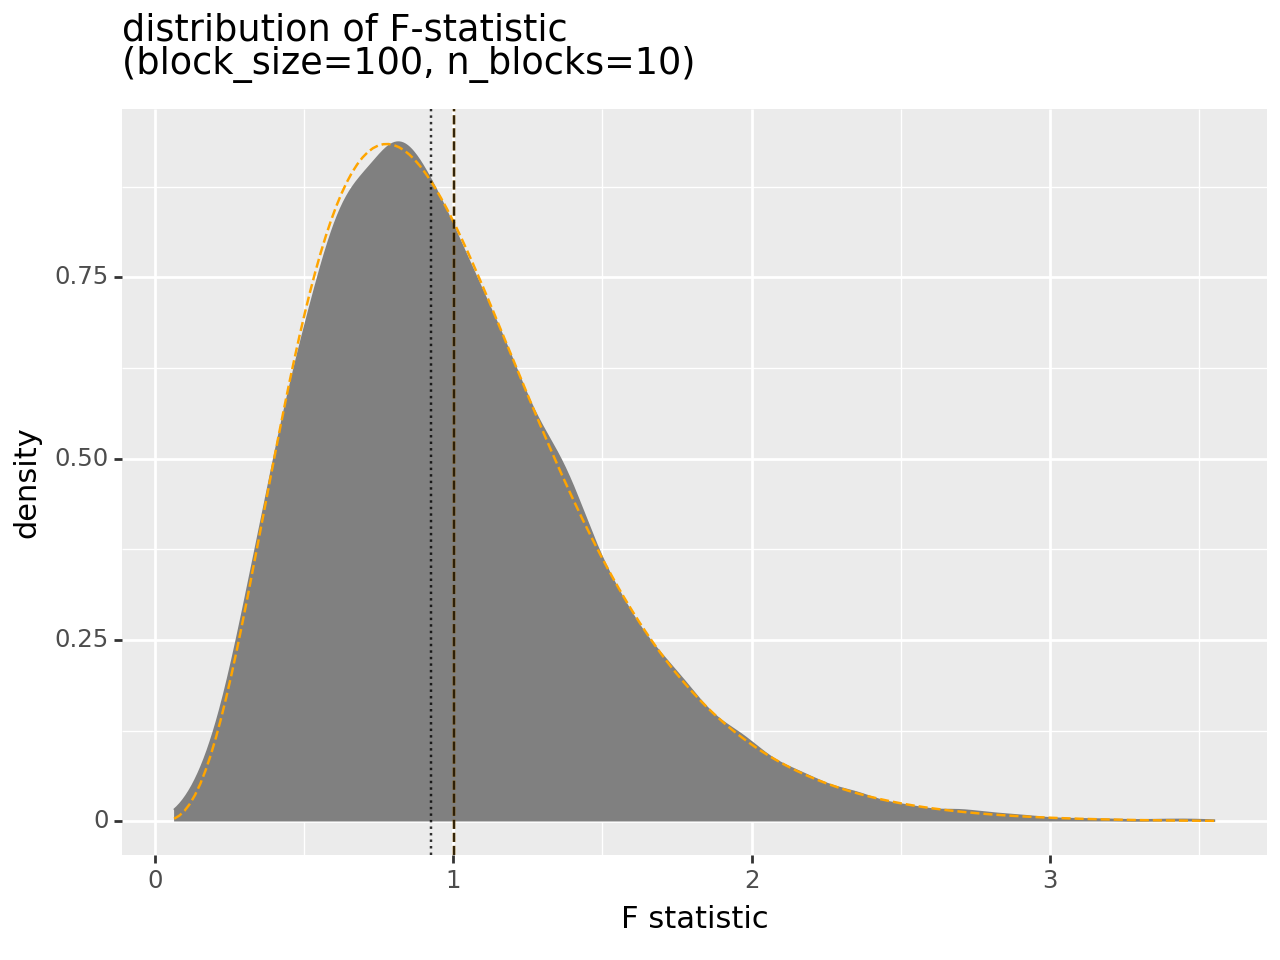

In [24]:
res_1 = plot_F_curve(
    generator_sampled_evals,
    n_blocks=n_blocks, 
    block_size=block_size, 
    title=f"distribution of F-statistic\n(block_size={block_size}, n_blocks={n_blocks})"
)
res_1.plot.draw()


The x-axis of this graph is the observed F-statistic for our new 10000 examples (each a data set of size 1000). Some examples have (by chance) high F-statistics, and some have low. The y-axis is "density" and this is scaled so that the gray area portrayed over any interval of F-statistics is the probability of seeing an F-statistic in the interval. The dotted vertical line is the median (the value with at least 1/2 of the examples fall above and 1/2 of the examples fall below), and the dashed vertical line is the mean F-statistic in the example set.

The dashed orange curve is the distribution density shape the theory says we should expect. The theory takes two parameters: how big each example is (1000 items per example) and how many partitions we are testing (10 partitions or groups). Given these two numbers: there is a expected distribution of outcomes, which is what the dashed orange curve is portraying.

We could directly estimate a significance by running our earlier numeric experiment. Or we can use the theory to look up the dashed orange curve (and this is called an F-test). The two methods are in very tight agreement. The theoretical method is much much faster and doesn't require the ability to generate new data.

To complete the test we then annotate in the value we are trying to determine the significance of. In first case we were wondering if an F-statistic of 0.61 is likely or unlikely under chance or data sets of this size and this many partitions.


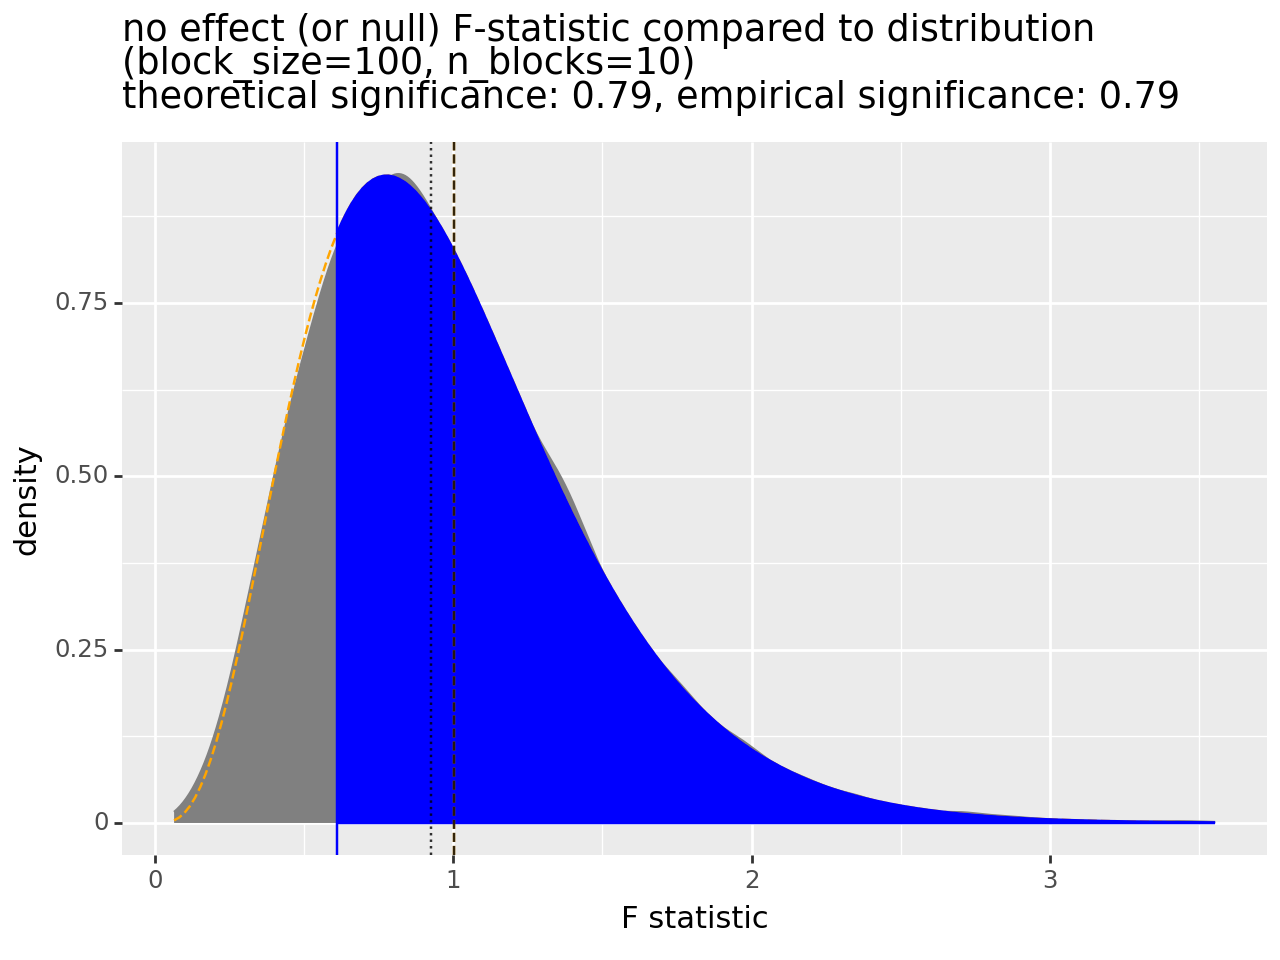

In [25]:
f_result_null = plot_F_curve(
    generator_sampled_evals,
    ref_value=f_stat_null,
    n_blocks=n_blocks, 
    block_size=block_size, 
    title=f"no effect (or null) F-statistic compared to distribution\n(block_size={block_size}, n_blocks={n_blocks})",
)

f_result_null.plot.draw()

In [26]:
assert np.abs(f_result_null.theoretical_significance - f_test_null.pvalue) < 1e-8

In [27]:
assert np.abs(f_result_null.theoretical_significance - f_result_null.empirical_significance) < 1e-2

In the above graph, the darker blue area are all F-statistics that would exceed our 0.61 F-statistic. This area is large, and in fact has area 0.79. This means there is a 79% chance of drawing a random example with an F-statistic at least this good. This in turn means: 0.61 F-statistic is nothing to get that excited about.

Let's run the analysis again for the other F statistic we were interested in (the 2.02).

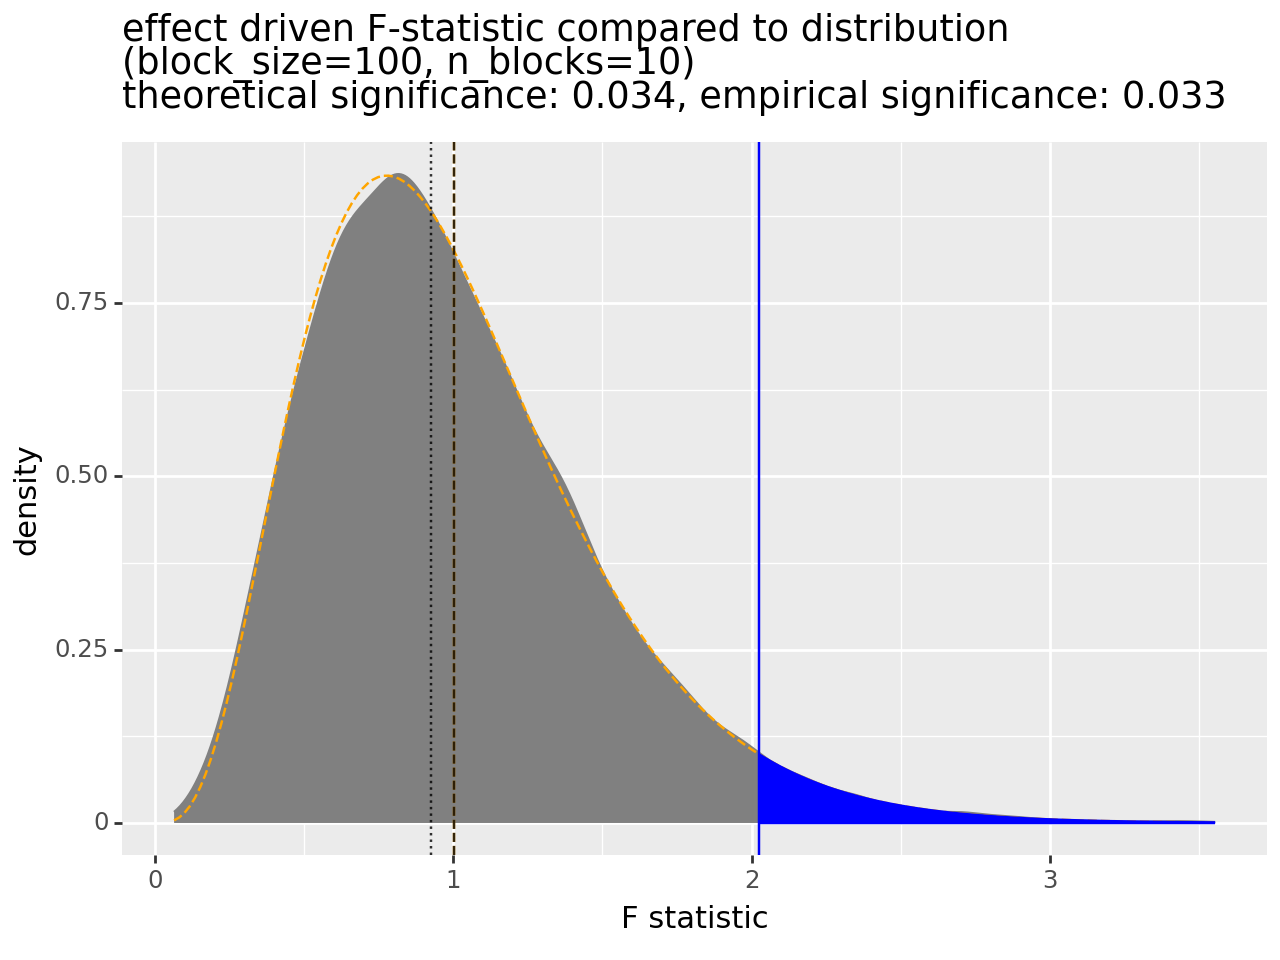

In [28]:
f_result_effect = plot_F_curve(
    generator_sampled_evals,
    ref_value=f_stat_effect,
    n_blocks=n_blocks, 
    block_size=block_size, 
    title=f"effect driven F-statistic compared to distribution\n(block_size={block_size}, n_blocks={n_blocks})",
)

f_result_effect.plot.draw()

In [29]:
assert np.abs(f_result_effect.theoretical_significance - f_test_effect.pvalue) < 1e-8

In [30]:
assert np.abs(f_result_effect.theoretical_significance - f_result_effect.empirical_significance) < 1e-3

Now we have an exciting situation: the observed F-statistic is rare in the "just produced by sampling noise" data set. That doesn't prove there is a predictive relation, but it is partial evidence against there not being such a relation.

## Resampling Methods

The F-test works on just a few parameters, and it does not require the ability to generate extra data to run the test. This is good, as in the real world we don't always have the ability to generate more examples at will.

However, there are in fact two tricks to simulate generating more data: [permutation tests](https://en.wikipedia.org/wiki/Permutation_test) and [bootstrap methods](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)). Both of these methods build new "null or no effect" examples to compare to by re-arranging copies of the original data item we are trying to study. These can be useful in computing significance of fit for more complicated models that we can't "just read off the correct F-distribution parameters" from a text book (such as decision trees, ensemble methods, and neural nets).

We will take a quick look at these "resampling" methods. It will be the case that using the resampling method can give the mean and variance of the appropriate F distribution, and that is enough to identify the distribution to use for significance statements. While this does use data it has two advantages to what we have done up to now:

  * The resampling doesn't require new data sets, it simulates new data by re-arranging data from a single example data set (itself made up of many rows).
  * It takes less data to estimate mean and variance than to look at the rare quantiles needed to directly estimate significance.

Resampling is a brilliant idea, and necessary for more complicated models (such as decision trees, ensembles, and neural nets).

### Permutation Resampling

For a permutation test we establish new copies of data with no relation between the outcome variable and the group or partition label by permuting the outcome labels. After the permutation there is no relation between a group label and the outcome, as the two are now often originating from different data rows.

We can quickly see we get results very close to original "generate more data to compare" method using `rng.permutation()`, and without needing access to the original data generator.

In [31]:
permutation_sampled_evals = [
    f_statistic(
        rng.permutation(f_values_effect), 
        n_blocks=n_blocks, 
        block_size=block_size)
    for i in range(n_reps)]

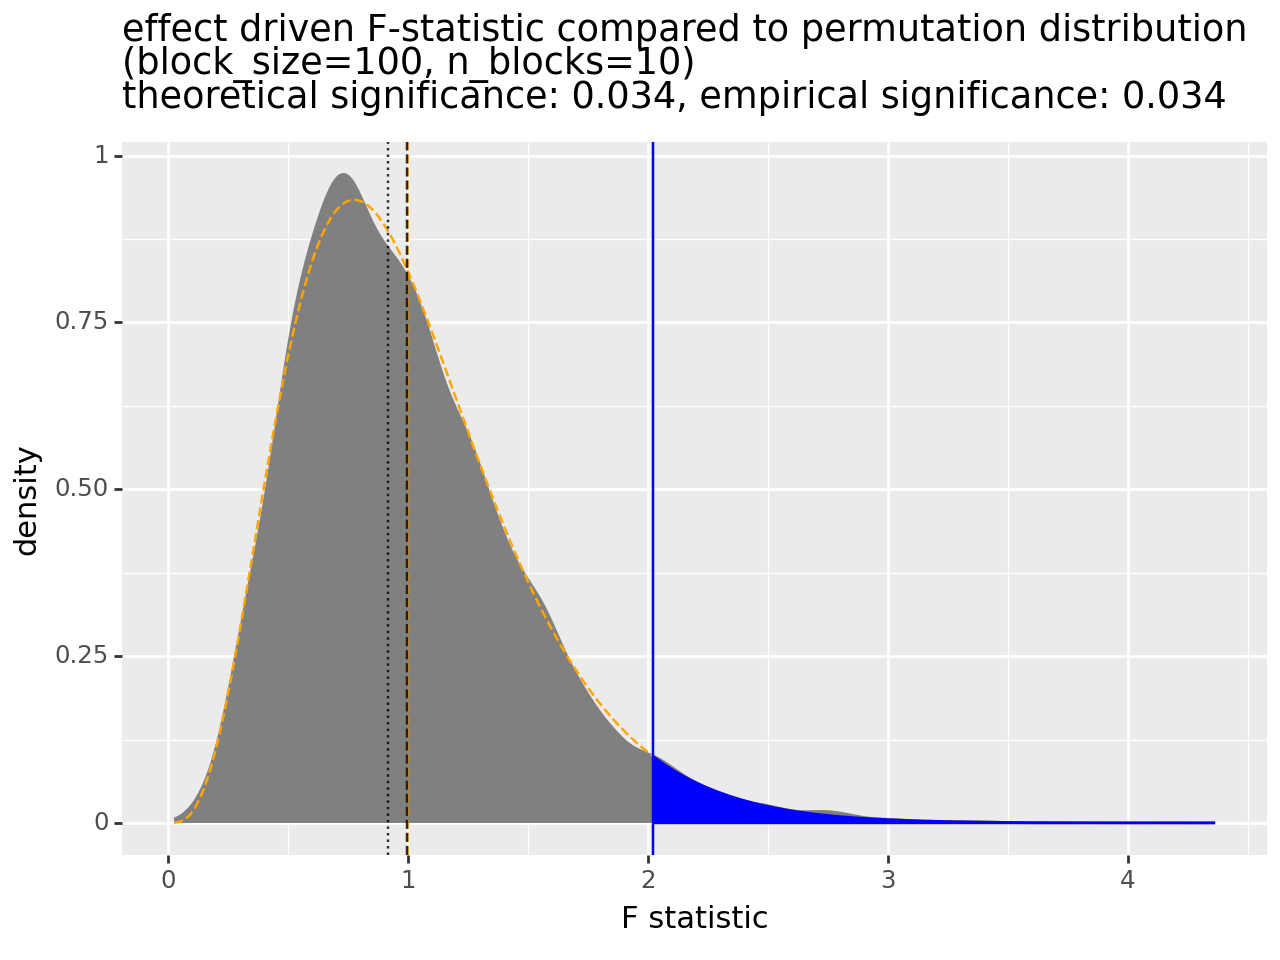

In [32]:
f_result_perm = plot_F_curve(
    permutation_sampled_evals,
    ref_value=f_stat_effect,
    n_blocks=n_blocks, 
    block_size=block_size, 
    title=f"effect driven F-statistic compared to permutation distribution\n(block_size={block_size}, n_blocks={n_blocks})",
)

f_result_perm.plot.draw()

In [33]:
assert np.abs(f_result_perm.theoretical_significance - f_result_perm.empirical_significance) < 5e-3

In [34]:
f_result_perm.f_summary.inferred_params

F_result(instances_per_sample=1000, empirical_mean=0.9976138478669405, empirical_var=0.2242495687555611, implied_n_variables=10, implied_d1=9, implied_d2=991, implied_mean=1.0020222446916076, implied_var=0.22560857406261275)

### Bootstrap Resampling

Bootstrap methods are similar to permutation tests. Many data sets the same size as the original data set are generated by "sampling with replacement." This means instead of permuting the order of the outcomes, we build a new outcome vector where each entry in our new vector can be any entry in the original (all with equal probability). In this scheme an instance from the original vector may appear multiple times in a single outcome simulation. This re-use is what is meant by "with replacement."

Again the F-test is robust to sampling in this manner.

In [35]:
bootstrap_sampled_evals = [
    f_statistic(
        rng.choice(f_values_effect, size=len(f_values_effect), replace=True), 
        n_blocks=n_blocks, 
        block_size=block_size)
    for i in range(n_reps)]

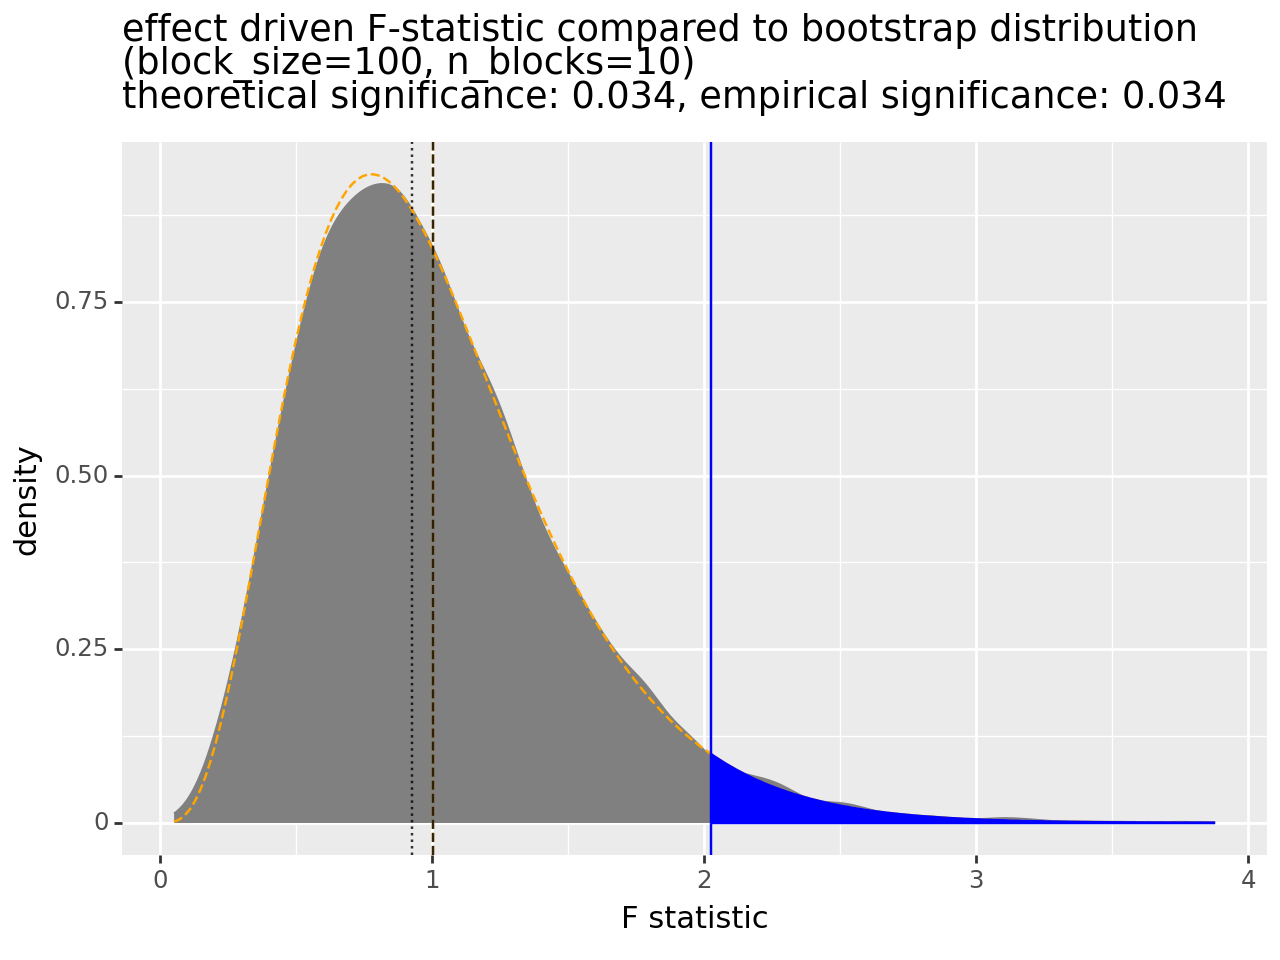

In [36]:
f_result_boot = plot_F_curve(
    bootstrap_sampled_evals,
    ref_value=f_stat_effect,
    n_blocks=n_blocks, 
    block_size=block_size, 
    title=f"effect driven F-statistic compared to bootstrap distribution\n(block_size={block_size}, n_blocks={n_blocks})",
)

f_result_boot.plot.draw()

In [37]:
assert np.abs(f_result_boot.theoretical_significance - f_result_boot.empirical_significance) < 5e-3

In [38]:
f_result_boot.f_summary.inferred_params

F_result(instances_per_sample=1000, empirical_mean=1.0041198160377054, empirical_var=0.22886957200601424, implied_n_variables=10, implied_d1=9, implied_d2=991, implied_mean=1.0020222446916076, implied_var=0.22560857406261275)

### Resampling in Context

Frankly resampling is magic. It lets us simulate access to much more data where it is known there is no relation between explanatory variables and outcome.

In most projects our team uses test, data hold out, and cross-validation procedures. Through experience, we deeply mistrust "in sample" measurements. However resampling methods can help you if you are willing to work with in sample measurements, as we are demonstrating in this article.

## The F-test as a Shape

The F-test is parameterized by two integers: `d1` and `d2`. From reference we can find that in our example these are:

  * `d1 = n_blocks - 1`
  * `d2 = n_blocks * block_size - n_blocks`

The correct values of `d1` and `d2` are well known and as above for linear regression problems, and for partitioning problems. However these values are usually not known for more complicated models such as decision trees, ensembles, and neural nets. Simply counting the number of parameters of such models is not always the right measure of model complexity.

Knowing these two values is enough to draw the orange density curve. And this in turn is enough to calculate areas of darker blue intervals and compute significances. A not bad estimate is `n_blocks = d1 + 1 ~ 1 + 1/variance_of_density`. And we can use a fitter to get an even better estimate.

`d1` and `d2` determine the shape of the curve. This can be reversed: knowing the shape of the gray density plot let's us estimate a matching `d1` and `d2`.  This means for an arbitrary model (not restricted to a linear regression or a partition): one can read off the effective model complexity by fitting to the gray density. We then say a model with a given `d1` has a model complexity similar to a linear model with `d1 + 1` variables (including the intercept) or a partition into `d1 + 1` parts.

With that said and done, we can recover the "effective complexity" represented by these data sets as follows.

In [39]:
res_1.f_summary.inferred_params.implied_n_variables

10

In [40]:
assert res_1.f_summary.inferred_params.implied_n_variables == n_blocks

## Conclusion

We have worked through the classic F-statistic and F-test, which are a big part of [analysis of variance](https://win-vector.com/2024/02/28/what-good-is-analysis-of-variance/). 

Some points to take away include:

  * The F-statistic is an "in sample" (uses training data) measure of how informative a given partition or grouping is in predicting an outcome.
  * The F-test converts the F-statistic to probability units.
  * For low-variance data, the F-test is a very robust test.
  * For partition and linear models: the F-statistic is ready to use with parameters available from references.
  * For complicated models, one needs to estimate the degrees of freedom using permutations or bootstrapping to apply the F-test.
  * In all cases: out of sample, test, hold-out, or cross-methods should be strongly considered for evaluation.

